In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found


In [136]:
path = r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools\data\trim\D_on_Mo_2.txt"
path = r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools\data\trim\D_on_Mo_4_1.00.txt"

with open(path, "r") as f:
    lines = f.readlines()
    
    
# df = pd.read_csv(path, sep = " ")

In [137]:
header_id = 0
table_id = -1

rawtables = []

debug = False

for i, line in enumerate(lines):
    lines[i] = line.replace("\n", "")
    
    if len(line.split()) > 0 and line.split()[0] == "1.":
        if debug is True: print("header >>", line)
        header_id = i
        table_id += 1
        
        
        rawtables.append({"header":line, "energy_dist":[], "polar":[], "azimuthal":[]})
        
    elif header_id != 0 and i == header_id + 2:
        if debug is True: print("nrgdst >>", line)
        rawtables[table_id]["energy_dist"].append(line)
        
    elif header_id != 0 and i > header_id + 3 and i < header_id + 3+6:
        if debug is True: print("polar  >>", line)
        rawtables[table_id]["polar"].append(line)
        
    elif header_id != 0 and i > header_id + 3+6 and i < header_id + 3+6+1+25:
        if debug is True: print("azimu  >>", line)
        rawtables[table_id]["azimuthal"].append(line)
        
    else:
        if debug is True: print("***** >>", line)
        

# lines

In [138]:
df = pd.DataFrame()
for i, table in enumerate(rawtables):
        header = table["header"].split()
        energy_dist = [float(x) for x in table["energy_dist"][0].split()]
        
        df.loc[i, "Ei"] = float(header[4])   # Incident energy
        df.loc[i, "angle"] = float(header[5])   # Angle of incidence
        df.loc[i, "Rf"] = float(header[6])    # Fast reflected fraction
        df.loc[i, "Es"] = np.mean(energy_dist)   # Scattered energy

df["alpha"] = df["Es"] / df["Ei"]   # Reflected energy fraction


In [110]:
%matplotlib inline

****************************************
NOTE: 0 DEGREES IS NORMAL INCIDENCE
****************************************


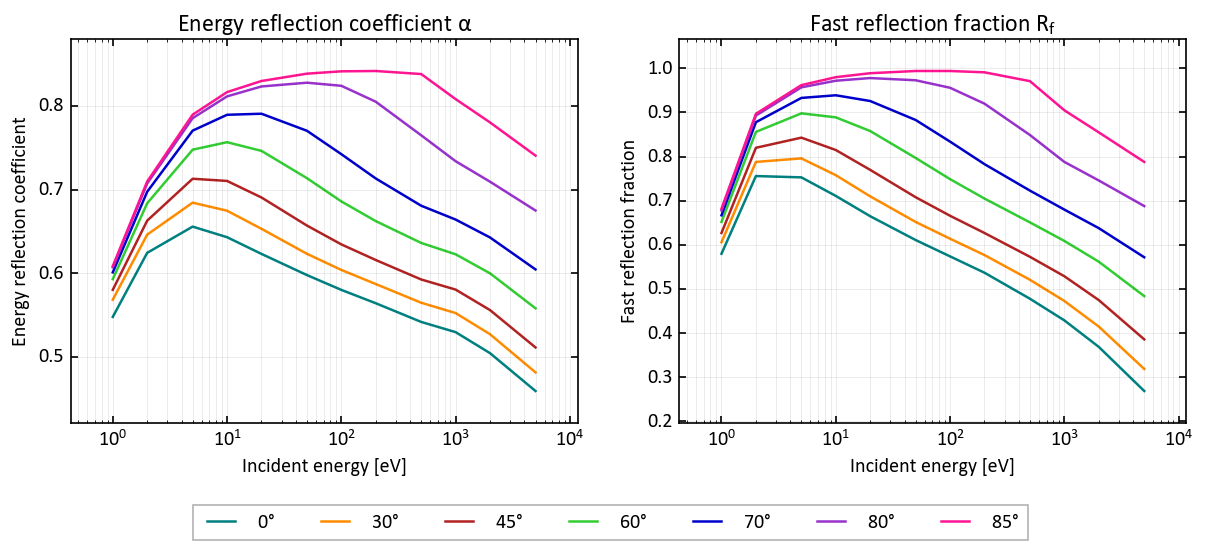

In [142]:
from sdtools.data.trim.read_trim import *

read_trim(path)

**************************************** 
NOTE: 0 DEGREES IS NORMAL INCIDENCE
 ****************************************


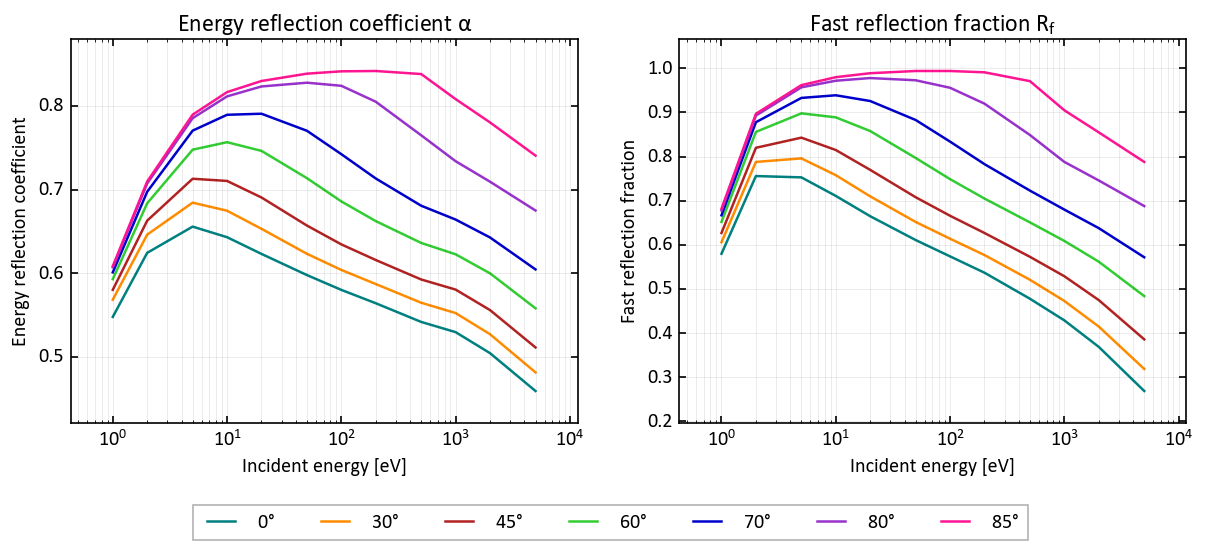

In [139]:
import sdtools.general.plotstyle
print("*"*40, "\nNOTE: 0 DEGREES IS NORMAL INCIDENCE\n", "*"*40)
fig, axes = plt.subplots(1,2, figsize = (12,4), dpi = 120)

list_Ei = df.groupby("Ei").first().index.values
list_angle = df.groupby("angle").first().index.values

ax = axes[0]
for angle in list_angle:
    sel = df.query(f"angle == {angle}")
    axes[0].plot(sel["Ei"], sel["alpha"], label = f"${angle:.0f}\degree$")
    axes[1].plot(sel["Ei"], sel["Rf"])
    

axes[0].set_ylabel("Energy reflection coefficient")
axes[0].set_title(r"Energy reflection coefficient $\alpha$")

axes[1].set_ylabel("Fast reflection fraction")
axes[1].set_title(r"Fast reflection fraction $R_{f}$")

for ax in axes:
    ax.set_xlabel("Incident energy [eV]")
    ax.set_xscale("log")
fig.legend(ncols = 7, bbox_to_anchor = (0.5, -0.05), loc = "upper center")


In [103]:
df.query("angle == 0.0")

,Ei,angle,Rf,Es,alpha
0,1.0,0.0,0.58,0.597966,0.597966
7,2.0,0.0,0.75,1.383362,0.691681
14,5.0,0.0,0.75,3.644520,0.728904
21,10.0,0.0,0.71,7.114760,0.711476
28,20.0,0.0,0.66,13.656040,0.682802
35,50.0,0.0,0.60,32.407000,0.648140
42,100.0,0.0,0.56,62.287000,0.622870
49,200.0,0.0,0.53,119.980800,0.599904
56,500.0,0.0,0.47,282.316400,0.564633
63,1000.0,0.0,0.41,533.514000,0.533514


In [75]:
np.mean(table["energy_dist"][0].split())

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

In [6]:
df

,Mo_on_D
0,1. 2.01 42. 95.94 1.00E+00 0.00E+00...
1,3.07570E-01 5.22450E-01 6.45910E-01 7.282...
2,3.14340E-01 5.43740E-01 7.05490E-01 8.371...
3,3.14410E-01 5.45550E-01 7.04190E-01 8.355...
4,3.16240E-01 5.48420E-01 7.06440E-01 8.397...
...,...
2683,9.88500E-01 9.96880E-01 9.98850E-01 9.996...
2684,9.79890E-01 9.94510E-01 9.97960E-01 9.993...
2685,9.68090E-01 9.90750E-01 9.96680E-01 9.990...
2686,9.42820E-01 9.83520E-01 9.93750E-01 9.981...
